In [1]:
# Setting up Git in colab
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [2]:
# Cloning the repo
!git clone https://github.com/ceciliak27/is5126_finalproj.git

Cloning into 'is5126_finalproj'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 161 (delta 28), reused 108 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (161/161), 13.50 MiB | 10.86 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [3]:
# installing required libraries
!pip install numpy pandas matplotlib

In [4]:
# import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)

# 1. Dataset

---

This dataset comes from the [World Values Survey](https://www.worldvaluessurvey.org/WVSDocumentationWV7.jsp) (WVS). In particular, Wave 7 data (obtained from 2017 - 2022) is used (extracted on 1 Nov 2025).

*Home › Data and Documentation › Data Download › Wave 7 (2017-2022)*

- https://www.worldvaluessurvey.org/WVSDocumentationWV7.jsp

The WVS consists of nationally representative surveys conducted in almost 100 countries which contain almost 90 percent of the world’s population, using a common questionnaire. The WVS seeks to help scientists and policy makers understand changes in the beliefs, values and motivations of people throughout the world.

#### Survey method

The main method of data collection in the WVS survey is face-to-face interview at respondent’s home / place of residence. Respondent’s answers could be recorded in a paper questionnaire (traditional way) or by CAPI (Computer Assisted Personal Interview). The approval of the Scientific Advisory Committee in writing is necessary for application of any methods of data collection other than face-to-face interview.

Based on the documentation, we extract out the relevant questions relating to Singapore as follows:

- Master Questionnaire (All Countries): "F00011012-WVS_WAVE_7_MASTER_QUESTIONNAIRE_2017-2021_ENGLISH.pdf"
- Singapore Questionnaire (with Singapore specific questions): "F00011463-WVS7_Questionnaire_Singapore_2020_English.pdf"
- Responses options matrix: "F00011055-WVS7_Codebook_Variables_report_V6.0.pdf"

The Singapore survey responses in particular was conducted by Social Lab under the Institute of Policy Studies from November 2019 to March 2020. The survey targeted citizens and permanent residents aged 21 and above, aiming for a sample size of 2,000 individuals.

One respondent was interviewed per Primary Statistical Unit. The respondent from each household was selected by using the last birthday method. Data was obtained by face-to-face survey interviews from trained interviewers.

In [9]:
# importing data csv files

url_master_sg = 'https://raw.githubusercontent.com/ceciliak27/is5126_finalproj/refs/heads/preprocessing/Data/RawData/WVS_Cross-National_Wave_7_csv_v6_0(SGP_Only).csv'
url_sg = 'https://raw.githubusercontent.com/ceciliak27/is5126_finalproj/refs/heads/preprocessing/Data/RawData/F00013217-WVS_Wave_7_Singapore_Excel_v5.1.csv'
df = pd.read_csv(url_sg)

df.head()

,version: Version of Data File,doi: Digital Object Identifier,A_YEAR: Year of survey,B_COUNTRY: ISO 3166-1 numeric country code,B_COUNTRY_ALPHA: ISO 3166-1 alpha-3 country code,C_COW_NUM: CoW country code numeric,C_COW_ALPHA: CoW country code alpha,D_INTERVIEW: Interview ID,FW_START: Year/month of start-fieldwork,FW_END: Year/month of end-fieldwork,...,WEIGHT4A: Overall Secular Values-4: Weight 4a,WEIGHT4B: Emancipative Values-4: Weight 4b,RESEMAVALBWGT: Weight for Emancipative values,RESEMAVALWGT: Weight for Emancipative values,SECVALBWGT: Weight for overall secular values Short Version,Y001_1: Materialist/postmaterialist 12-item index: Component 1,Y001_2: Materialist/postmaterialist 12-item index: Component 2,Y001_3: Materialist/postmaterialist 12-item index: Component 3,Y001_4: Materialist/postmaterialist 12-item index: Component 4,Y001_5: Materialist/postmaterialist 12-item index: Component 5
0,6-0-0 (2024-04-15),doi.org/10.14281/18241.20,2020,702,SGP,830,SIN,702070001,201911,202003,...,1.0,1.0,1.0,1.0,0.83,0,0,0,1,0
1,6-0-0 (2024-04-15),doi.org/10.14281/18241.20,2020,702,SGP,830,SIN,702070002,201911,202003,...,1.0,1.0,1.0,1.0,0.83,1,1,1,0,1
2,6-0-0 (2024-04-15),doi.org/10.14281/18241.20,2020,702,SGP,830,SIN,702070003,201911,202003,...,1.0,1.0,1.0,1.0,1.00,1,0,1,0,1
3,6-0-0 (2024-04-15),doi.org/10.14281/18241.20,2020,702,SGP,830,SIN,702070004,201911,202003,...,1.0,1.0,1.0,1.0,1.00,1,0,0,0,0
4,6-0-0 (2024-04-15),doi.org/10.14281/18241.20,2020,702,SGP,830,SIN,702070005,201911,202003,...,1.0,1.0,1.0,1.0,1.00,0,0,0,0,0



# 2. Exploratory Data Analysis

---

### 2.1 Load the dataset
- Load the Singapore data file(s) into a DataFrame (completed in part 1 above).
- Show shape and head  (completed in part 1 above).
- Show number of data points.


In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 387 columns):
 #    Column                                                                                                                                          Non-Null Count  Dtype  
---   ------                                                                                                                                          --------------  -----  
 0    version: Version of Data File                                                                                                                   2012 non-null   object 
 1    doi: Digital Object Identifier                                                                                                                  2012 non-null   object 
 2    A_YEAR: Year of survey                                                                                                                          2012 non-null   int64  
 3    B_COUNTRY: ISO 3

In [14]:
df.describe()


,A_YEAR: Year of survey,B_COUNTRY: ISO 3166-1 numeric country code,C_COW_NUM: CoW country code numeric,D_INTERVIEW: Interview ID,FW_START: Year/month of start-fieldwork,FW_END: Year/month of end-fieldwork,K_TIME_START: Start time of the interview [HH.MM],K_TIME_END: End time of the interview [HH.MM],K_DURATION: Total length of interview [minutes],Q_MODE: Mode of data collection,...,WEIGHT4A: Overall Secular Values-4: Weight 4a,WEIGHT4B: Emancipative Values-4: Weight 4b,RESEMAVALBWGT: Weight for Emancipative values,RESEMAVALWGT: Weight for Emancipative values,SECVALBWGT: Weight for overall secular values Short Version,Y001_1: Materialist/postmaterialist 12-item index: Component 1,Y001_2: Materialist/postmaterialist 12-item index: Component 2,Y001_3: Materialist/postmaterialist 12-item index: Component 3,Y001_4: Materialist/postmaterialist 12-item index: Component 4,Y001_5: Materialist/postmaterialist 12-item index: Component 5
count,2012.0,2012.0,2012.0,2.012000e+03,2012.0,2012.0,2012.000000,2012.000000,2012.000000,2012.0,...,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
mean,2020.0,702.0,830.0,7.020710e+08,201911.0,202003.0,17.331257,18.245080,54.385686,2.0,...,0.986650,0.992565,0.994339,0.995311,0.983355,0.476640,0.265905,0.448807,0.317594,0.599404
std,0.0,0.0,0.0,5.809587e+02,0.0,0.0,3.477873,3.445957,22.156721,0.0,...,0.066052,0.049739,0.032338,0.022337,0.052489,0.550711,0.477615,0.570154,0.475170,0.533847
min,2020.0,702.0,830.0,7.020700e+08,201911.0,202003.0,10.040000,10.420000,29.000000,2.0,...,0.660000,0.660000,0.660000,0.745000,0.660000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,2020.0,702.0,830.0,7.020705e+08,201911.0,202003.0,14.547500,15.550000,39.000000,2.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,702.0,830.0,7.020710e+08,201911.0,202003.0,17.405000,18.340000,49.000000,2.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2020.0,702.0,830.0,7.020715e+08,201911.0,202003.0,20.420000,21.350000,62.000000,2.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2020.0,702.0,830.0,7.020720e+08,201911.0,202003.0,23.220000,23.590000,175.000000,2.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The dataset has 2,012 responses from participants (from df.info).

The data columns can be largely grouped into the following available data:
- Survey-related info (Technical Variables): "A_YEAR" to "PWGHT"
- Core questionnaire variables: "Q1" to "Q290"
- WVS indexes: "Y001" to "Y001_5"

### 2.2 Identify columns with null / missing data
- Based on the below exploration, there are NULL data mainly in WVS index columns.
- Based on the survey variables coding, a large number of the questions also have the following options in the survey results:

    * -1 : Don't know
    * -2 : No answer
    * -4 : Not asked in survey
    * -5 : Missing; Not available

- These are equivalent to not having any available data for the respective question, and we equate such responses to NULL data in the results, and will require further processing (identifying out the NULL data and imputing or dropping the data points).

In [22]:
print(df.isnull().sum())

version: Version of Data File                                                                                                                       0
doi: Digital Object Identifier                                                                                                                      0
A_YEAR: Year of survey                                                                                                                              0
B_COUNTRY: ISO 3166-1 numeric country code                                                                                                          0
B_COUNTRY_ALPHA: ISO 3166-1 alpha-3 country code                                                                                                    0
C_COW_NUM: CoW country code numeric                                                                                                                 0
C_COW_ALPHA: CoW country code alpha                                                                 

In [27]:
cols_with_null = df.isnull().any().sum()
print(f"Number of columns with null values: {cols_with_null}")

numeric_df = df.select_dtypes(include='number')
cols_with_neg = (numeric_df < 0).any().sum()
print(f"Number of columns with negative values: {cols_with_neg}")

Number of columns with null values: 31
Number of columns with negative values: 270


### 2.3 Exploration of target value (feature Q274)

Create views of the target goal (Q274: Number of children per household) and to give a quick overview of the data.

Range of 'No of Children' target values: 0.0 to 10.0



Text(0.5, 1.0, 'Number of Children')

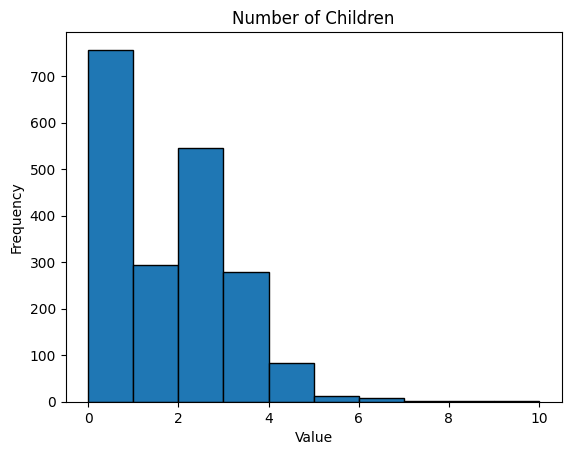

In [37]:
target_val = df['Q274: How many children do you have']
target_val[target_val < 0] = np.nan

print(f"Range of 'No of Children' target values: {target_val.min()} to {target_val.max()}\n")

# Plot histogram
plt.hist(target_val, edgecolor="black")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Number of Children')


# 3. Preprocessing

---

### 3.1 Assess features relevancy (based on documentation) and impute data types

- We identify out the categorical features / numeric features that we will use
- Classify features as categorical / numeric
- Classify the data in either of the few variables to handle preprocessing later:
    * categorical_features
    * float_features
    * columns_to_drop

In [80]:
column_names = list(df.columns)
print(column_names)

['version: Version of Data File', 'doi: Digital Object Identifier', 'A_YEAR: Year of survey', 'B_COUNTRY: ISO 3166-1 numeric country code', 'B_COUNTRY_ALPHA: ISO 3166-1 alpha-3 country code', 'C_COW_NUM: CoW country code numeric', 'C_COW_ALPHA: CoW country code alpha', 'D_INTERVIEW: Interview ID', 'FW_START: Year/month of start-fieldwork', 'FW_END: Year/month of end-fieldwork', 'K_TIME_START: Start time of the interview [HH.MM]', 'K_TIME_END: End time of the interview [HH.MM]', 'K_DURATION: Total length of interview [minutes]', 'Q_MODE: Mode of data collection', 'N_REGION_ISO: Region ISO 3166-2', 'N_REGION_WVS: Region country specific', 'G_TOWNSIZE: Settlement size_8 groups', 'G_TOWNSIZE2: Settlement size_5 groups', 'H_SETTLEMENT: Settlement type', 'H_URBRURAL: Urban-Rural', 'O1_LONGITUDE: Geographical Coordinates - Longitude', 'O2_LATITUDE: Geographical Coordinates - Latitude', 'S_INTLANGUAGE: Language in which interview was conducted', 'LNGE_ISO: Language in which interview was condu

### 3.2 Survey-related info (Technical Variables): "A_YEAR" to "PWGHT"


In [83]:
# "N_REGION_ISO" refers to ISO 3166-2 regional classification: https://www.iso.org/obp/ui/#search/code/ classification by "Central Singapore", "North East", etc.
# check that n_region_iso and n_region_wvs is the same, if yes, we can remove one of the column to avoid duplicate.

print("Whether N_REGION_ISO and N_REGION_WVS have the same data:")
print(df['N_REGION_ISO: Region ISO 3166-2'].equals(df['N_REGION_WVS: Region country specific']))

categorical_features = ['N_REGION_ISO: Region ISO 3166-2']
float_features = ['O1_LONGITUDE: Geographical Coordinates - Longitude', 'O2_LATITUDE: Geographical Coordinates - Latitude']

print(f"\nCurrent no. of features retained: {len(categorical_features) + len(float_features)}")
print(f"\nCurrent features retained: {categorical_features + float_features}")


Whether N_REGION_ISO and N_REGION_WVS have the same data:
True

Current no. of features retained: 3

Current features retained: ['N_REGION_ISO: Region ISO 3166-2', 'O1_LONGITUDE: Geographical Coordinates - Longitude', 'O2_LATITUDE: Geographical Coordinates - Latitude']


**Columns that will remain and preprocessing done**

- 'N_REGION_ISO: Region ISO 3166-2'
- 'O1_LONGITUDE: Geographical Coordinates - Longitude'
- 'O2_LATITUDE: Geographical Coordinates - Latitude'



**Columns relating to survey assessment (not relevant for analysis, to ignore)**

- 'version: Version of Data File'
- 'doi: Digital Object Identifier'
- 'A_YEAR: Year of survey'
- 'B_COUNTRY: ISO 3166-1 numeric country code' *(Since all data is Singapore, country level identifier will not be relevant)*
- 'B_COUNTRY_ALPHA: ISO 3166-1 alpha-3 country code'
- 'C_COW_NUM: CoW country code numeric'
- 'C_COW_ALPHA: CoW country code alpha'
- 'D_INTERVIEW: Interview ID'
- 'FW_START: Year/month of start-fieldwork'
- 'FW_END: Year/month of end-fieldwork'
- 'K_TIME_START: Start time of the interview [HH.MM]'
- 'K_TIME_END: End time of the interview [HH.MM]'
- 'K_DURATION: Total length of interview [minutes]'
- 'Q_MODE: Mode of data collection'
- 'N_REGION_WVS: Region country specific' *(Same data as N_REGION_ISO above, to remove)*
- 'G_TOWNSIZE: Settlement size_8 groups'
- 'G_TOWNSIZE2: Settlement size_5 groups'
- 'H_SETTLEMENT: Settlement type'
- 'H_URBRURAL: Urban-Rural'
- 'S_INTLANGUAGE: Language in which interview was conducted'
- 'LNGE_ISO: Language in which interview was conducted  (ISO 639-1 Alpha 2 digit)'
- 'E_RESPINT: Respondent interested during the interview'
- 'F_INTPRIVACY: Interview privacy'
- "E1_LITERACY: Respondent's literacy"
- 'W_WEIGHT: Weight'
- 'S018: Equilibration weight-1000'
- 'PWGHT: Population size weight'


In [50]:
# Survey-related info (Technical Variables): "A_YEAR" to "PWGHT"

columns_to_drop = ['version: Version of Data File',
'doi: Digital Object Identifier',
'A_YEAR: Year of survey',
'B_COUNTRY: ISO 3166-1 numeric country code',
'B_COUNTRY_ALPHA: ISO 3166-1 alpha-3 country code',
'C_COW_NUM: CoW country code numeric',
'C_COW_ALPHA: CoW country code alpha',
'D_INTERVIEW: Interview ID',
'FW_START: Year/month of start-fieldwork',
'FW_END: Year/month of end-fieldwork',
'K_TIME_START: Start time of the interview [HH.MM]',
'K_TIME_END: End time of the interview [HH.MM]',
'K_DURATION: Total length of interview [minutes]',
'Q_MODE: Mode of data collection',
'N_REGION_ISO: Region ISO 3166-2',
'N_REGION_WVS: Region country specific',
'G_TOWNSIZE: Settlement size_8 groups',
'G_TOWNSIZE2: Settlement size_5 groups',
'H_SETTLEMENT: Settlement type',
'H_URBRURAL: Urban-Rural',
'O1_LONGITUDE: Geographical Coordinates - Longitude',
'O2_LATITUDE: Geographical Coordinates - Latitude',
'S_INTLANGUAGE: Language in which interview was conducted',
'LNGE_ISO: Language in which interview was conducted  (ISO 639-1 Alpha 2 digit)',
'E_RESPINT: Respondent interested during the interview',
'F_INTPRIVACY: Interview privacy',
"E1_LITERACY: Respondent's literacy",
'W_WEIGHT: Weight',
'S018: Equilibration weight-1000',
'PWGHT: Population size weight',]


### 3.3 Core questionnaire variables: "Q1" to "Q290"

Dataset has "derivative" data:
- e.g. of same data being recoded
- "Q277: Highest educational level: Respondent's Mother [ISCED 2011]" and "Q277A: Highest educational level: Respondent's Mother (country specific)" and "Q277R: Highest educational level: Respondent's Mother (recoded into 3 groups)"
- "Q289: Religious denominations - major groups" and "Q289CS9: Religious denomination - detailed list"

To extract the relevant original categorical features to avoid duplicates.

In [84]:
# dataset has additional derivative values
# we only extract the original categorical column names to avoid duplicates

import re

q_columns = [col for col in column_names if re.match(r"^Q\d+:", col)]

print(f"Questionnaire columns: {q_columns}")

categorical_features.extend(q_columns)

print(f"\nCurrent no. of features retained: {len(categorical_features) + len(float_features)}")
print(f"Current features retained: {categorical_features + float_features}")


Questionnaire columns: ['Q1: Important in life: Family', 'Q2: Important in life: Friends', 'Q3: Important in life: Leisure time', 'Q4: Important in life: Politics', 'Q5: Important in life: Work', 'Q6: Important in life: Religion', 'Q7: Important child qualities: good manners', 'Q8: Important child qualities: independence', 'Q9: Important child qualities: hard work', 'Q10: Important child qualities: feeling of responsibility', 'Q11: Important child qualities: imagination', 'Q12: Important child qualities: tolerance and respect for other people', 'Q13: Important child qualities: thrift saving money and things', 'Q14: Important child qualities: determination perseverance', 'Q15: Important child qualities: religious faith', 'Q16: Important child qualities: unselfishness', 'Q17: Important child qualities: obedience', 'Q18: Neighbors: Drug addicts', 'Q19: Neighbors: People of a different race', 'Q20: Neighbors: People who have AIDS', 'Q21: Neighbors: Immigrants/foreign workers', 'Q22: Neighb

### 3.4 WVS indexes: "Y001" to "Y001_5"

As these are features derived from existing columns, we do not plan to use these features and will not include them in the processed df.

- 'Y001: Post-Materialist index 12-item'
- 'Y002: Post-Materialist index 4-item'
- 'Y003: Autonomy Index'
- 'SACSECVAL: SACSECVAL.- Welzel Overall Secular Values'
...

### 3.5 Handling null / missing data

In particular for the Questionnaire columns, most of the columns have additional potential options that should be evaluated to NULL.

- -1 : Don't know
- -2 : No answer
- -4 : Not asked in survey
- -5 : Missing; Not available

We first change these data to NULL, and assess how many rows have null data.

In [94]:
# copy out relevant columns to processed_df

processed_df = df[categorical_features + float_features].copy()

# handle negative values as NULL

for col in categorical_features:
  processed_df.loc[processed_df[col] < 0, col] = np.nan

print("processed_df:")
display(processed_df.head())

# display how many NULL values

print("\nNumber of NULL values per feature:")
processed_df.isnull().sum()


processed_df:


,N_REGION_ISO: Region ISO 3166-2,Q1: Important in life: Family,Q2: Important in life: Friends,Q3: Important in life: Leisure time,Q4: Important in life: Politics,Q5: Important in life: Work,Q6: Important in life: Religion,Q7: Important child qualities: good manners,Q8: Important child qualities: independence,Q9: Important child qualities: hard work,...,Q283: Respondent's Father - Occupational group (when respondent was 14 years old),Q284: Sector of employment,Q285: Are you the chief wage earner in your house,Q286: Family savings during past year,Q287: Social class (subjective),Q288: Scale of incomes,Q289: Religious denominations - major groups,Q290: Ethnic group,O1_LONGITUDE: Geographical Coordinates - Longitude,O2_LATITUDE: Geographical Coordinates - Latitude
0,702001.0,1.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,...,3.0,2.0,2.0,1.0,2.0,5.0,0.0,702004.0,103.82,1.23
1,702001.0,1.0,2.0,1.0,3.0,3.0,2.0,1.0,2.0,1.0,...,4.0,NaN,1.0,2.0,4.0,1.0,0.0,702004.0,103.81,1.23
2,702001.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,...,7.0,2.0,1.0,1.0,4.0,4.0,0.0,702004.0,103.84,1.22
3,702001.0,1.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,2.0,...,1.0,2.0,2.0,1.0,3.0,6.0,0.0,702004.0,103.84,1.22
4,702001.0,1.0,1.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,...,5.0,2.0,2.0,1.0,2.0,8.0,5.0,702003.0,103.84,1.23



Number of NULL values per feature:


,0
N_REGION_ISO: Region ISO 3166-2,0
Q1: Important in life: Family,2
Q2: Important in life: Friends,0
Q3: Important in life: Leisure time,0
Q4: Important in life: Politics,16
Q5: Important in life: Work,6
Q6: Important in life: Religion,7
Q7: Important child qualities: good manners,0
Q8: Important child qualities: independence,0
Q9: Important child qualities: hard work,0


Some columns have high number of NULL values.
- 'Q276: Highest educational level: Respondent's Spouse [ISCED 2011]'- 813 NULL values
- 'Q280: Employment status - Respondent's Spouse' - 808 NULL values


Approach: to impute the mode for these missing data so that we retain the available data for training.

In [86]:
# process all features

for col in categorical_features:
    processed_df[col] = processed_df[col].astype('category')

for col in float_features:
    processed_df[col] = pd.to_numeric(processed_df[col], errors='coerce')

print(f"\nProcessed columns: {list(processed_df.columns)}")
display(processed_df.dtypes)
display(processed_df.head())


Processed columns: ['N_REGION_ISO: Region ISO 3166-2', 'Q1: Important in life: Family', 'Q2: Important in life: Friends', 'Q3: Important in life: Leisure time', 'Q4: Important in life: Politics', 'Q5: Important in life: Work', 'Q6: Important in life: Religion', 'Q7: Important child qualities: good manners', 'Q8: Important child qualities: independence', 'Q9: Important child qualities: hard work', 'Q10: Important child qualities: feeling of responsibility', 'Q11: Important child qualities: imagination', 'Q12: Important child qualities: tolerance and respect for other people', 'Q13: Important child qualities: thrift saving money and things', 'Q14: Important child qualities: determination perseverance', 'Q15: Important child qualities: religious faith', 'Q16: Important child qualities: unselfishness', 'Q17: Important child qualities: obedience', 'Q18: Neighbors: Drug addicts', 'Q19: Neighbors: People of a different race', 'Q20: Neighbors: People who have AIDS', 'Q21: Neighbors: Immigrant

,0
N_REGION_ISO: Region ISO 3166-2,category
Q1: Important in life: Family,category
Q2: Important in life: Friends,category
Q3: Important in life: Leisure time,category
Q4: Important in life: Politics,category
Q5: Important in life: Work,category
Q6: Important in life: Religion,category
Q7: Important child qualities: good manners,category
Q8: Important child qualities: independence,category
Q9: Important child qualities: hard work,category


,N_REGION_ISO: Region ISO 3166-2,Q1: Important in life: Family,Q2: Important in life: Friends,Q3: Important in life: Leisure time,Q4: Important in life: Politics,Q5: Important in life: Work,Q6: Important in life: Religion,Q7: Important child qualities: good manners,Q8: Important child qualities: independence,Q9: Important child qualities: hard work,...,Q283: Respondent's Father - Occupational group (when respondent was 14 years old),Q284: Sector of employment,Q285: Are you the chief wage earner in your house,Q286: Family savings during past year,Q287: Social class (subjective),Q288: Scale of incomes,Q289: Religious denominations - major groups,Q290: Ethnic group,O1_LONGITUDE: Geographical Coordinates - Longitude,O2_LATITUDE: Geographical Coordinates - Latitude
0,702001,1,2,1,3,2,2,2,1,2,...,3,2,2,1,2,5,0,702004,103.82,1.23
1,702001,1,2,1,3,3,2,1,2,1,...,4,-2,1,2,4,1,0,702004,103.81,1.23
2,702001,1,1,2,2,2,3,1,2,2,...,7,2,1,1,4,4,0,702004,103.84,1.22
3,702001,1,2,2,3,3,4,1,1,2,...,1,2,2,1,3,6,0,702004,103.84,1.22
4,702001,1,1,1,4,1,2,1,1,1,...,5,2,2,1,2,8,5,702003,103.84,1.23


### 3.3 Assess relevant features based on survey description

### 3.4 Correlation chart

### 3.5 Scaling data

# 4. Exporting the preprocessed data

---

### 4.1 Exporting data as csv file

In [ ]:
from google.colab import files

df.to_csv('preprocessed_data.csv', index=False)
files.download('preprocessed_data.csv')